## Understanding __Comment Count__ as a proxy to understand YouTube Statistics
### By Raj Tejaswee (202011060)

_Importing all the required libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from collections import Counter
import datetime
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})

Fetching _datasets_ into the dataframes

In [2]:
df_IN = pd.read_csv(r'./IN_youtube_trending_data.csv')
df_US = pd.read_csv(r'./US_youtube_trending_data.csv')

### __Data Preprocessing for Month__
Now, as we are given with the date as when the particular video was published, we will extract out month as seprate column for the India and US dataframes.

In [3]:
df_IN['month'] = df_IN['publishedAt'].str[5:7]
df_IN['month'] = df_IN['month'].astype('int32')

df_US['month'] = df_US['publishedAt'].str[5:7]
df_US['month'] = df_US['month'].astype('int32')

df_IN['year'] = df_IN['publishedAt'].str[0:4]
df_US['year'] = df_US['publishedAt'].str[0:4]


### __Data Cleansing__
In order to create the correlation matrices for both India and US, we will be removing the columns which does not hold any relevance.

In [4]:
lst_rem1 = ['video_id', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description']

lst_rem2 = ['video_id', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description']

df_IN_corr = df_IN.drop(columns=lst_rem1)
df_US_corr = df_US.drop(columns=lst_rem2)

## __Analyzing Correlations__

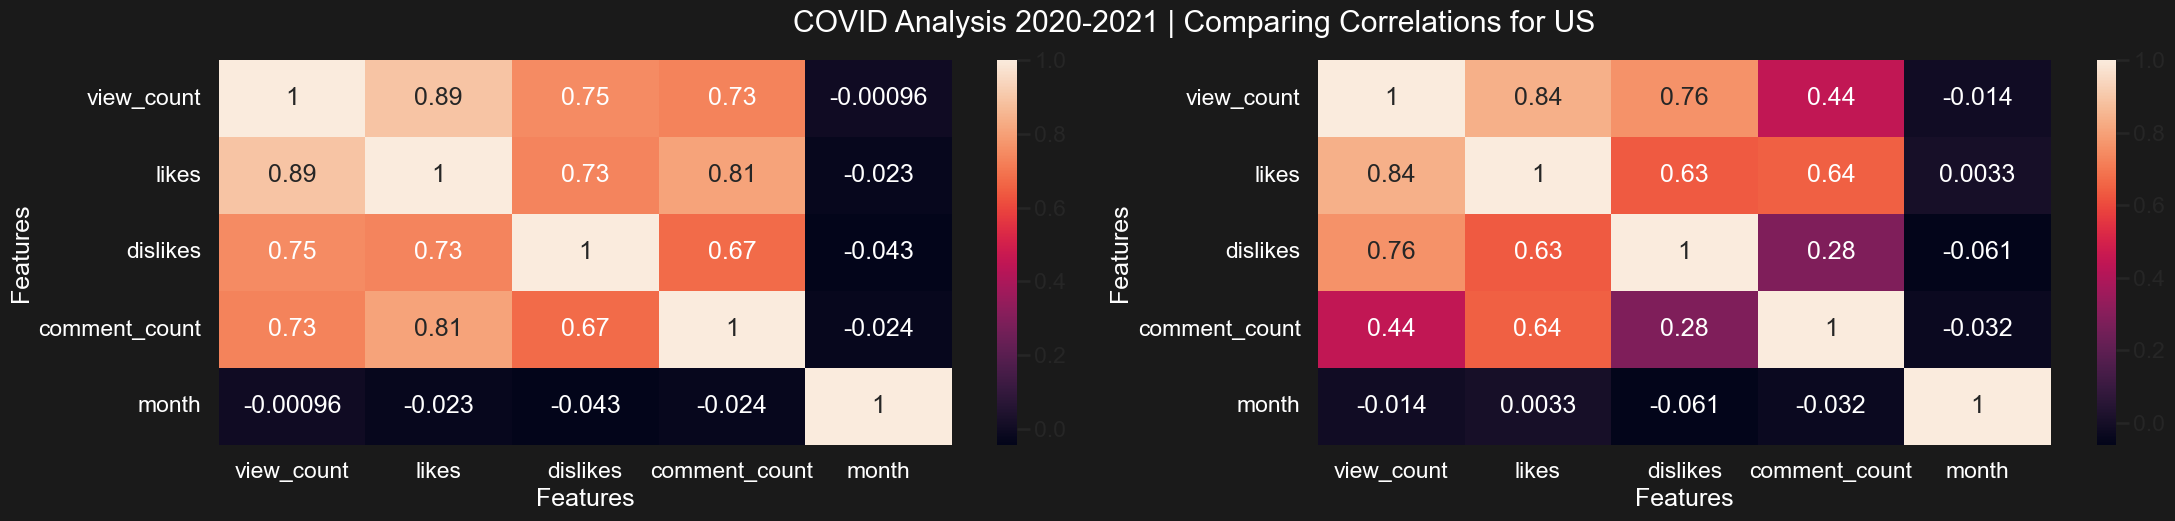

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dark background style
sns.set_style("dark")

# Create the subplots with a dark background
fig, axes = plt.subplots(1, 2, figsize=(26 , 5), facecolor='k')

# Set the title and text color to white
fig.suptitle('COVID Analysis 2020-2021 | Comparing Correlations for US', color='w')

# Plot the heatmaps with white text color
sns.heatmap(ax=axes[0], data=df_US_corr[df_US_corr['year'] == '2020'].corr(), annot=True)
sns.heatmap(ax=axes[1], data=df_US_corr[df_US_corr['year'] == '2021'].corr(), annot=True)

# Set the axis and title labels with white text color
axes[0].set_xlabel('Features', color='w')
axes[0].set_ylabel('Features', color='w')
axes[1].set_xlabel('Features', color='w')
axes[1].set_ylabel('Features', color='w')

# Set the title color to white
axes[0].title.set_color('w')
axes[1].title.set_color('w')

# Set the tick label colors to white
axes[0].tick_params(colors='w')
axes[1].tick_params(colors='w')

# Set the background color to black
axes[0].set_facecolor('k')
axes[1].set_facecolor('k')

# Show the plot
plt.show()


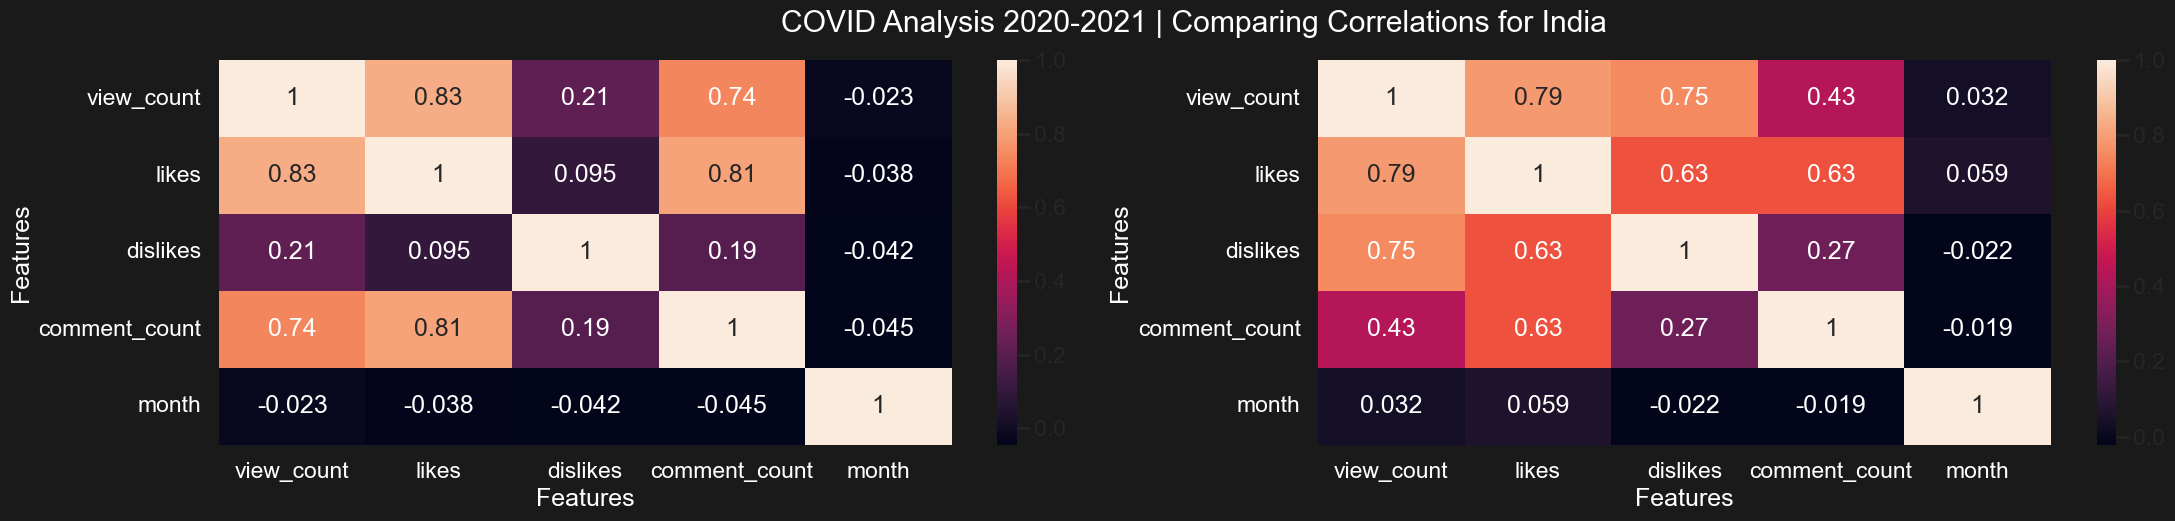

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dark background style
sns.set_style("dark")

# Create the subplots with a dark background
fig, axes = plt.subplots(1, 2, figsize=(26, 5), facecolor='k')

# Set the title and text color to white
fig.suptitle('COVID Analysis 2020-2021 | Comparing Correlations for India', color='w')

# Plot the heatmaps with white text color
sns.heatmap(ax=axes[0], data=df_IN_corr[df_IN_corr['year'] == '2020'].corr(), annot=True)
sns.heatmap(ax=axes[1], data=df_IN_corr[df_IN_corr['year'] == '2021'].corr(), annot=True)

# Set the axis and title labels with white text color
axes[0].set_xlabel('Features', color='w')
axes[0].set_ylabel('Features', color='w')
axes[1].set_xlabel('Features', color='w')
axes[1].set_ylabel('Features', color='w')

# Set the title color to white
axes[0].title.set_color('w')
axes[1].title.set_color('w')

# Set the tick label colors to white
axes[0].tick_params(colors='w')
axes[1].tick_params(colors='w')

# Set the background color to black
axes[0].set_facecolor('k')
axes[1].set_facecolor('k')

# Show the plot
plt.show()


In [7]:
import plotly.express as px
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add a bar trace to the figure
fig.add_trace(go.Bar(x=df_US_corr['year'], y=df_US_corr['comment_count']))

fig.update_layout(
    plot_bgcolor='black',  # Set the background color to black
    paper_bgcolor='black',  
    font=dict(color='white')  
)

# Customize the axis labels and plot title
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Comment Count', type='linear')  # Set y-axis to be continuous

fig.update_layout(title='Comment Count Over the Years (Black Background)')

# Show the plot
fig.show()


<Axes: xlabel='year', ylabel='comment_count'>

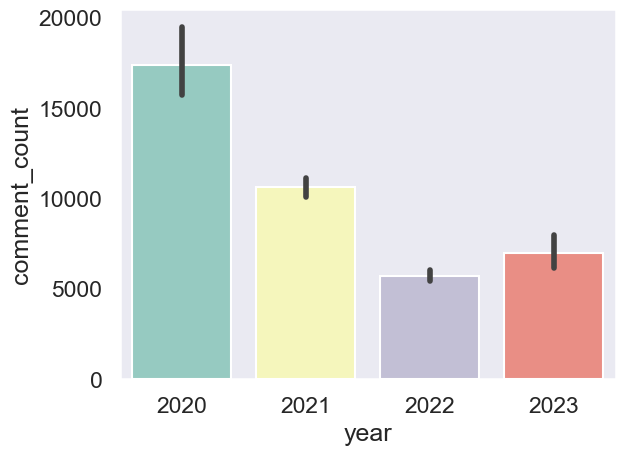

In [8]:
sns.barplot(df_IN_corr, x='year', y='comment_count')

In [9]:
df_IN_corr

title  view_count   likes  \
0       Sadak 2 | Official Trailer | Sanjay | Pooja | ...     9885899  224925   
1       Kya Baat Aa : Karan Aujla (Official Video) Tan...    11308046  655450   
2       Diljit Dosanjh: CLASH (Official) Music Video |...     9140911  296533   
3       Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...    23564512  743931   
4       Baarish (Official Video) Payal Dev,Stebin Ben ...     6783649  268817   
...                                                   ...         ...     ...   
173741  India's Republic Day Parade 26th January, 2023...     5339420   76044   
173742  I Secretly CHEATED In a MINECRAFT MOB BATTLE C...      516200   34016   
173743  #Kudumbavilakku പ്രശ്നങ്ങൾ ഒഴിഞ്ഞു... സുമിത്ര ...      678632    5656   
173744  भारत जोड़ो यात्रा के बाद दिलचस्प हुआ मोदी- राहु...      694024   28929   
173745  Bigg Boss 16 Promo | Priyanka and Team Ne Khel...      725108   10076   

        dislikes  comment_count  month  year  
0        3979409         350210      8  2020  
1          33242         405146      8  2020  
2           6179          30058      8  2020  
3          84162         136942      8  2020  
4           8798          22984      8  2020  
...          ...            ...    ...   ...  
173741         0           2257      1  2023  
173742         0           1178      1  2023  
173743         0            204      1  2023  
173744         0           1751      1  2023  
173745         0           5688      2  2023  

[173746 rows x 7 columns]

In [10]:
import plotly.express as px
px.box(df_IN_corr, x='comment_count', y='year', log_x=True, title='<b>Dispersion in Comment Count</b> from 2020-2024', range_x=[75,10000000],
       template='plotly_dark', color='year')

In [11]:
fig =  px.scatter(df_US_corr, x='view_count', y = 'comment_count', log_y=True, log_x = True,template='plotly_dark', color='year')
fig.update_layout(title='Showcasing Moderately Positive Correlation in b/w <b>Comment Count and View Count</b> year-wise')

In [12]:
fig =  px.scatter(df_US_corr, x='likes', y = 'comment_count', log_y=True, log_x = True,template='plotly_dark', color='year')
fig.update_layout(title='Showcasing Strong Positive Correlation in b/w <b>Comment Count and View Count</b> year-wise')

In [13]:
df_IN_corr['LDL_ratio'] = df_IN_corr['likes'] / df_IN_corr['dislikes']
df_US_corr['LDL_ratio'] = df_US_corr['likes'] / df_US_corr['dislikes']

In [14]:
lst_year = [2020,2021]
df_IN_corr['year'] = df_IN_corr['year'].astype('int32')
df_US_corr['year'] = df_US_corr['year'].astype('int32')
df_gIN = df_IN_corr.groupby('year')
df_gUS = df_US_corr.groupby('year')

In [15]:
df_US_corr['title_len'] = df_US_corr['title']
df_IN_corr['title_len'] = df_IN_corr['title']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


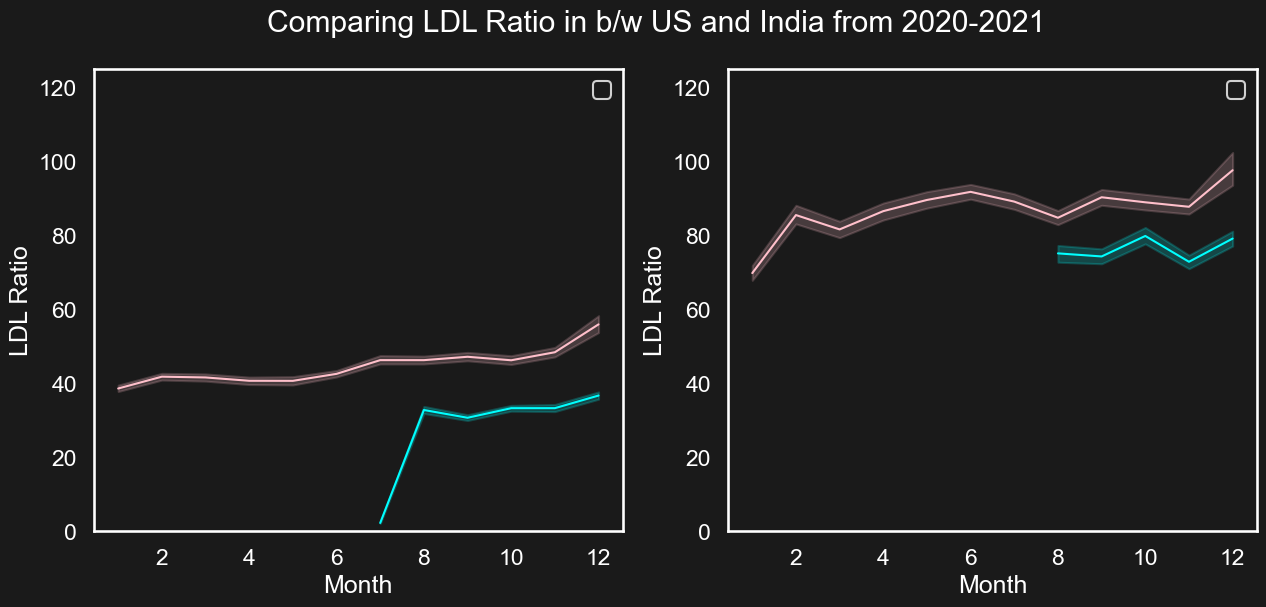

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
colors = ['cyan','pink']

# Set the dark background style
sns.set_style("dark")

# Create the subplots with a dark background
fig, axes = plt.subplots(1, 2, figsize=(15, 6), facecolor='k')
fig.suptitle('Comparing LDL Ratio in b/w US and India from 2020-2021', color='w')

# Plot the data with a light line color
for i, year in enumerate(lst_year):
    sns.lineplot(df_gIN.get_group(year), x='month', y='LDL_ratio', ax=axes[0], color=colors[i % len(colors)], linewidth=1.5)
for i, year in enumerate(lst_year):
    sns.lineplot(df_gUS.get_group(year), x='month', y='LDL_ratio', ax=axes[1], color=colors[i % len(colors)], linewidth=1.5)

# Set the y limits to be the same for both subplots
y_min = 0
y_max = 125
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Set the axis and title labels with white text color
axes[0].set_xlabel('Month', color='w')
axes[0].set_ylabel('LDL Ratio', color='w')
axes[1].set_xlabel('Month', color='w')
axes[1].set_ylabel('LDL Ratio', color='w')

# Set the title color to white
axes[0].title.set_color('w')
axes[1].title.set_color('w')

# Set the tick label colors to white
axes[0].tick_params(colors='w')
axes[1].tick_params(colors='w')

# Set the background color to black
axes[0].set_facecolor('k')
axes[1].set_facecolor('k')

# Set the legend color to white
axes[0].legend(facecolor='k', edgecolor='w')
axes[1].legend(facecolor='k', edgecolor='w')

# Show the plot
plt.show()

In [17]:
df_US_corr['title_len'] = 0
df_US_corr['title_len'] = df_US_corr['title_len'].astype('int64')

In [18]:
df_US_corr

title  view_count   likes  \
0                      I ASKED HER TO BE MY GIRLFRIEND...     1514614  156908   
1       Apex Legends | Stories from the Outlands – “Th...     2381688  146739   
2       I left youtube for a month and THIS is what ha...     2038853  353787   
3       XXL 2020 Freshman Class Revealed - Official An...      496771   23251   
4       Ultimate DIY Home Movie Theater for The LaBran...     1123889   45802   
...                                                   ...         ...     ...   
181785               I BOUGHT A $1000 MAKEUP MYSTERY BOX!      824845   37443   
181786              Every Johto Pokémon Game Freak Forgot      572721   26968   
181787                Making a Lava Resin Axe (it glows!)      598063   30255   
181788      XG - LEFT RIGHT (XG SHOOTING STAR LIVE STAGE)     2576745  129690   
181789  I regret selling my channel. WILL HE? I spent ...      869701   77016   

        dislikes  comment_count  month  year   LDL_ratio  title_len  
0           5855          35313      8  2020   26.798975          0  
1           2794          16549      8  2020   52.519327          0  
2           2628          40221      8  2020  134.622146          0  
3           1856           7647      8  2020   12.527478          0  
4            964           2196      8  2020   47.512448          0  
...          ...            ...    ...   ...         ...        ...  
181785         0           1740      1  2023         inf          0  
181786         0           3488      1  2023         inf          0  
181787         0           1783      1  2023         inf          0  
181788         0           4382      1  2023         inf          0  
181789         0           3040      1  2023         inf          0  

[181790 rows x 9 columns]

In [19]:
for i in range(0, len(df_US_corr['title'])):
    df_US_corr.loc[i,'title_len'] = len(df_US_corr.iloc[i, 0])

In [20]:
for i in range(0, len(df_IN_corr['title'])):
    df_IN_corr.loc[i,'title_len'] = len(df_IN_corr.iloc[i, 0])

In [21]:
df_IN_corr

title  view_count   likes  \
0       Sadak 2 | Official Trailer | Sanjay | Pooja | ...     9885899  224925   
1       Kya Baat Aa : Karan Aujla (Official Video) Tan...    11308046  655450   
2       Diljit Dosanjh: CLASH (Official) Music Video |...     9140911  296533   
3       Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...    23564512  743931   
4       Baarish (Official Video) Payal Dev,Stebin Ben ...     6783649  268817   
...                                                   ...         ...     ...   
173741  India's Republic Day Parade 26th January, 2023...     5339420   76044   
173742  I Secretly CHEATED In a MINECRAFT MOB BATTLE C...      516200   34016   
173743  #Kudumbavilakku പ്രശ്നങ്ങൾ ഒഴിഞ്ഞു... സുമിത്ര ...      678632    5656   
173744  भारत जोड़ो यात्रा के बाद दिलचस्प हुआ मोदी- राहु...      694024   28929   
173745  Bigg Boss 16 Promo | Priyanka and Team Ne Khel...      725108   10076   

        dislikes  comment_count  month  year  LDL_ratio title_len  
0        3979409         350210      8  2020   0.056522        92  
1          33242         405146      8  2020  19.717526        97  
2           6179          30058      8  2020  47.990452        55  
3          84162         136942      8  2020   8.839274        98  
4           8798          22984      8  2020  30.554331       100  
...          ...            ...    ...   ...        ...       ...  
173741         0           2257      1  2023        inf        53  
173742         0           1178      1  2023        inf        57  
173743         0            204      1  2023        inf        58  
173744         0           1751      1  2023        inf        56  
173745         0           5688      2  2023        inf        83  

[173746 rows x 9 columns]

In [22]:
df_US_corr['title_len'] =  df_US_corr['title_len'].astype('int32')
df_IN_corr['title_len'] =  df_IN_corr['title_len'].astype('int32')

In [23]:
print(df_US_corr["title_len"].unique())

[ 34  60  53  56  55  24  18  72  30  48  57  36  49  23  14  25  45  44
  47  16  69  50  15  58  99  82  51  40 100  52  26  33  67  62  98  61
  66  96  31  84  29   4  79  65  35  37  38  21  81  70  28  74  54   9
  59  41  27  86  87  46  76  77  32  42  20  39  97  75  93  78  92  85
  64  63  91  19  43  73  90  68  80  71  95  17  10  83  88  94  22   5
  89  13  11  12   8   7   6   3   1   2]


In [24]:
df_US_corr

title  view_count   likes  \
0                      I ASKED HER TO BE MY GIRLFRIEND...     1514614  156908   
1       Apex Legends | Stories from the Outlands – “Th...     2381688  146739   
2       I left youtube for a month and THIS is what ha...     2038853  353787   
3       XXL 2020 Freshman Class Revealed - Official An...      496771   23251   
4       Ultimate DIY Home Movie Theater for The LaBran...     1123889   45802   
...                                                   ...         ...     ...   
181785               I BOUGHT A $1000 MAKEUP MYSTERY BOX!      824845   37443   
181786              Every Johto Pokémon Game Freak Forgot      572721   26968   
181787                Making a Lava Resin Axe (it glows!)      598063   30255   
181788      XG - LEFT RIGHT (XG SHOOTING STAR LIVE STAGE)     2576745  129690   
181789  I regret selling my channel. WILL HE? I spent ...      869701   77016   

        dislikes  comment_count  month  year   LDL_ratio  title_len  
0           5855          35313      8  2020   26.798975         34  
1           2794          16549      8  2020   52.519327         60  
2           2628          40221      8  2020  134.622146         53  
3           1856           7647      8  2020   12.527478         56  
4            964           2196      8  2020   47.512448         55  
...          ...            ...    ...   ...         ...        ...  
181785         0           1740      1  2023         inf         36  
181786         0           3488      1  2023         inf         37  
181787         0           1783      1  2023         inf         35  
181788         0           4382      1  2023         inf         45  
181789         0           3040      1  2023         inf         63  

[181790 rows x 9 columns]

In [25]:
df_US_corr = df_US_corr[df_US_corr['title'] != '!@#$%$#!! || Dubov vs Carlsen || Airthings Masters (2020)']

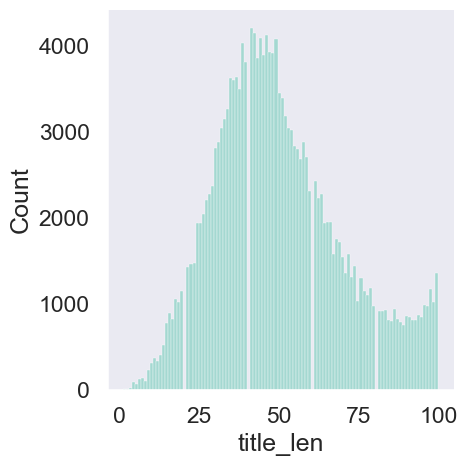

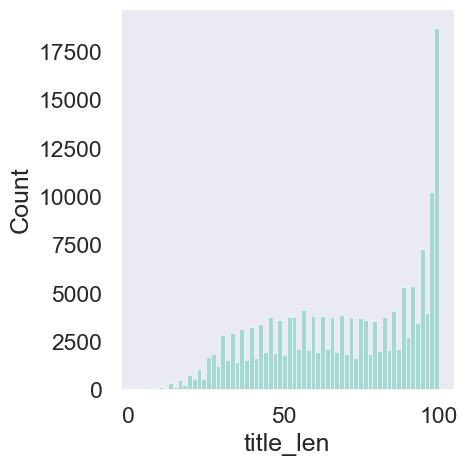

In [26]:
sns.displot(df_US_corr, x = 'title_len')
sns.displot(df_IN_corr, x = 'title_len')

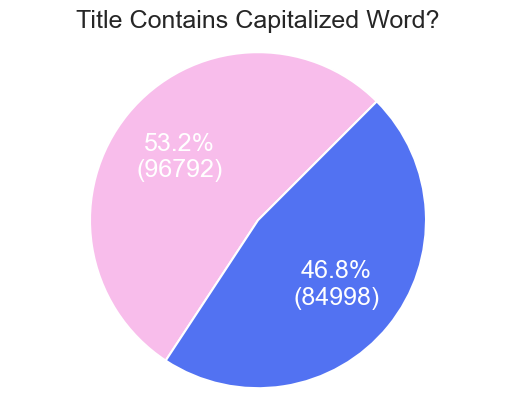

In [28]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df = df_US
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts = df["contains_capitalized"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}),
           colors=['#f8bdeb', '#5272f2'], textprops={'color': 'white'},
           autopct=lambda pct: f"{pct:.1f}%\n({pct/100*value_counts.sum():.0f})",
           startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')